## Decision Trees

As always, let's begin by importing our handy dandy pandas package. Today, we'll also be using numpy.

In [43]:
import pandas as pd
import numpy as np

We're using this dataset to build a model that predicts whether a **shark attack** is fatal based on various factors. The dataset includes details such as the year, location (country), activity at the time of the attack, sex and age of the individual, and species of the shark involved.

Our target variable is `fatal_y_n`, which indicates whether an attack was fatal (Y) or not (N). By analyzing patterns in the data, we aim to identify key factors that contribute to the severity of shark attacks and build a predictive model that helps assess risk.

To improve our model’s performance, we’ll preprocess the data, encode categorical variables, and fine-tune hyperparameters to avoid overfitting. Let’s dive in!

In [44]:
df = pd.read_csv('shark_attacks.csv')
print(df.shape)
df.iloc[:5]

(1530, 8)


,year,type,country,activity,sex,age,species,fatal_y_n
0,2023.0,Unprovoked,AUSTRALIA,Surfing,M,46,Large Predatory Sharks,Y
1,2022.0,Unprovoked,AUSTRALIA,Spearfishing,M,38,Large Predatory Sharks,N
2,2021.0,Unprovoked,USA,Surfing,M,25,Other Category,N
3,2021.0,Unprovoked,USA,Swimming,M,26,Small Sharks (Size-Based),N
4,2021.0,Unprovoked,USA,Surfing,M,14,Other Category,N


Let's take a glance at our data set before moving on with building a model:

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1530 non-null   float64
 1   type       1530 non-null   object 
 2   country    1530 non-null   object 
 3   activity   1530 non-null   object 
 4   sex        1530 non-null   object 
 5   age        1530 non-null   int64  
 6   species    1530 non-null   object 
 7   fatal_y_n  1530 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 95.8+ KB


Great! We have no null values and all of our columns are the proper data type.

Let's look at the values of our response variable.

In [46]:
df['fatal_y_n'].value_counts()

fatal_y_n
N    1336
Y     194
Name: count, dtype: int64

### Practice Problem

Notice that the `fatal_y_n` column is encoded as "Y" or "N". We need this column to be in the form of 1 or 0 so that the decision tree can make predictions. Use the `apply` method to make this change in the `fatal_y_n` column.

In [47]:
# Answer here:
df['fatal_y_n'] = df['fatal_y_n'].apply(lambda x: 1 if x == "Y" else 0 if x == "N" else np.nan)

### Modeling with Decision Trees

In [48]:
from sklearn.model_selection import train_test_split # to create training and testing data
from sklearn.tree import DecisionTreeClassifier  # to build a decision tree model
from sklearn.tree import plot_tree # to plot the decision tree
import matplotlib.pyplot as plt # for data visualization purposes
from sklearn.metrics import roc_auc_score # to evaluate model using ROC AUC

Before we start modeling, there's one more problem that must be overcome. Decision trees can't directly understand categorical variables, as they require numerical input to make splits. If you try to feed a column with text values (e.g., `"red"`, `"blue"`, `"green"`) into a decision tree, it won’t know how to process the data. This is where `pd.get_dummies()` comes in.

**What `get_dummies` Does**
get_dummies is a pandas function that converts categorical variables into a numerical format using one-hot encoding. It creates separate binary columns for each unique category, allowing models like decision trees to interpret categorical data correctly.

**Why This Matters for Decision Trees**
Decision trees split data based on feature values, so categorical data must be represented numerically. Encoding categories properly ensures the model makes meaningful splits rather than treating categories as arbitrary numbers.

By using `pd.get_dummies()`, you make categorical data decision-tree-friendly, improving model accuracy and interpretability.

In [49]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.iloc[:5]

,year,age,fatal_y_n,type_Sea Disaster,type_Unprovoked,type_Watercraft,country_BAHAMAS,country_BRAZIL,country_MEXICO,country_NEW ZEALAND,...,country_SOUTH AFRICA,country_USA,activity_Spearfishing,activity_Surfing,activity_Swimming,sex_M,species_Large Sharks (Size-Based),species_Other Category,species_Other Named Sharks,species_Small Sharks (Size-Based)
0,2023.0,46,1,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,2022.0,38,0,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,2021.0,25,0,False,True,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
3,2021.0,26,0,False,True,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,True
4,2021.0,14,0,False,True,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False


Notice that our numerical variables were unaffected, and our categorical variables were all turned into dummies encoded as `True` or `False` (this has the same effect as being encoded as 0 or 1). You may also notice that we have a lot more columns now. This is because there is now a column for each category that was previously contained within one column. This is something to be mindful about: if you have a column with lots of categories, you will create lots of columns by dummy encoding!

Now that we have our dummy variables, we're ready to move on to our next step. Remember that no matter what Machine Learning algorithm we use, we **MUST** perform a Train-Test Split. This is all about making predictions, so we need to test our model on data it hasn't seen.

In [50]:
X = df_dummy.drop(columns = ['fatal_y_n'])
y = df_dummy['fatal_y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 412)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1071, 20)
(459, 20)
(1071,)
(459,)


And now we can create our decision tree using the `DecisionTreeClassifier` function.

In [51]:
tree = DecisionTreeClassifier(criterion = 'entropy') # initialize decision tree model
tree.fit(X_train, y_train) # train the decision tree model

DecisionTreeClassifier(criterion='entropy')

Now let's plot this model to see what's going on.

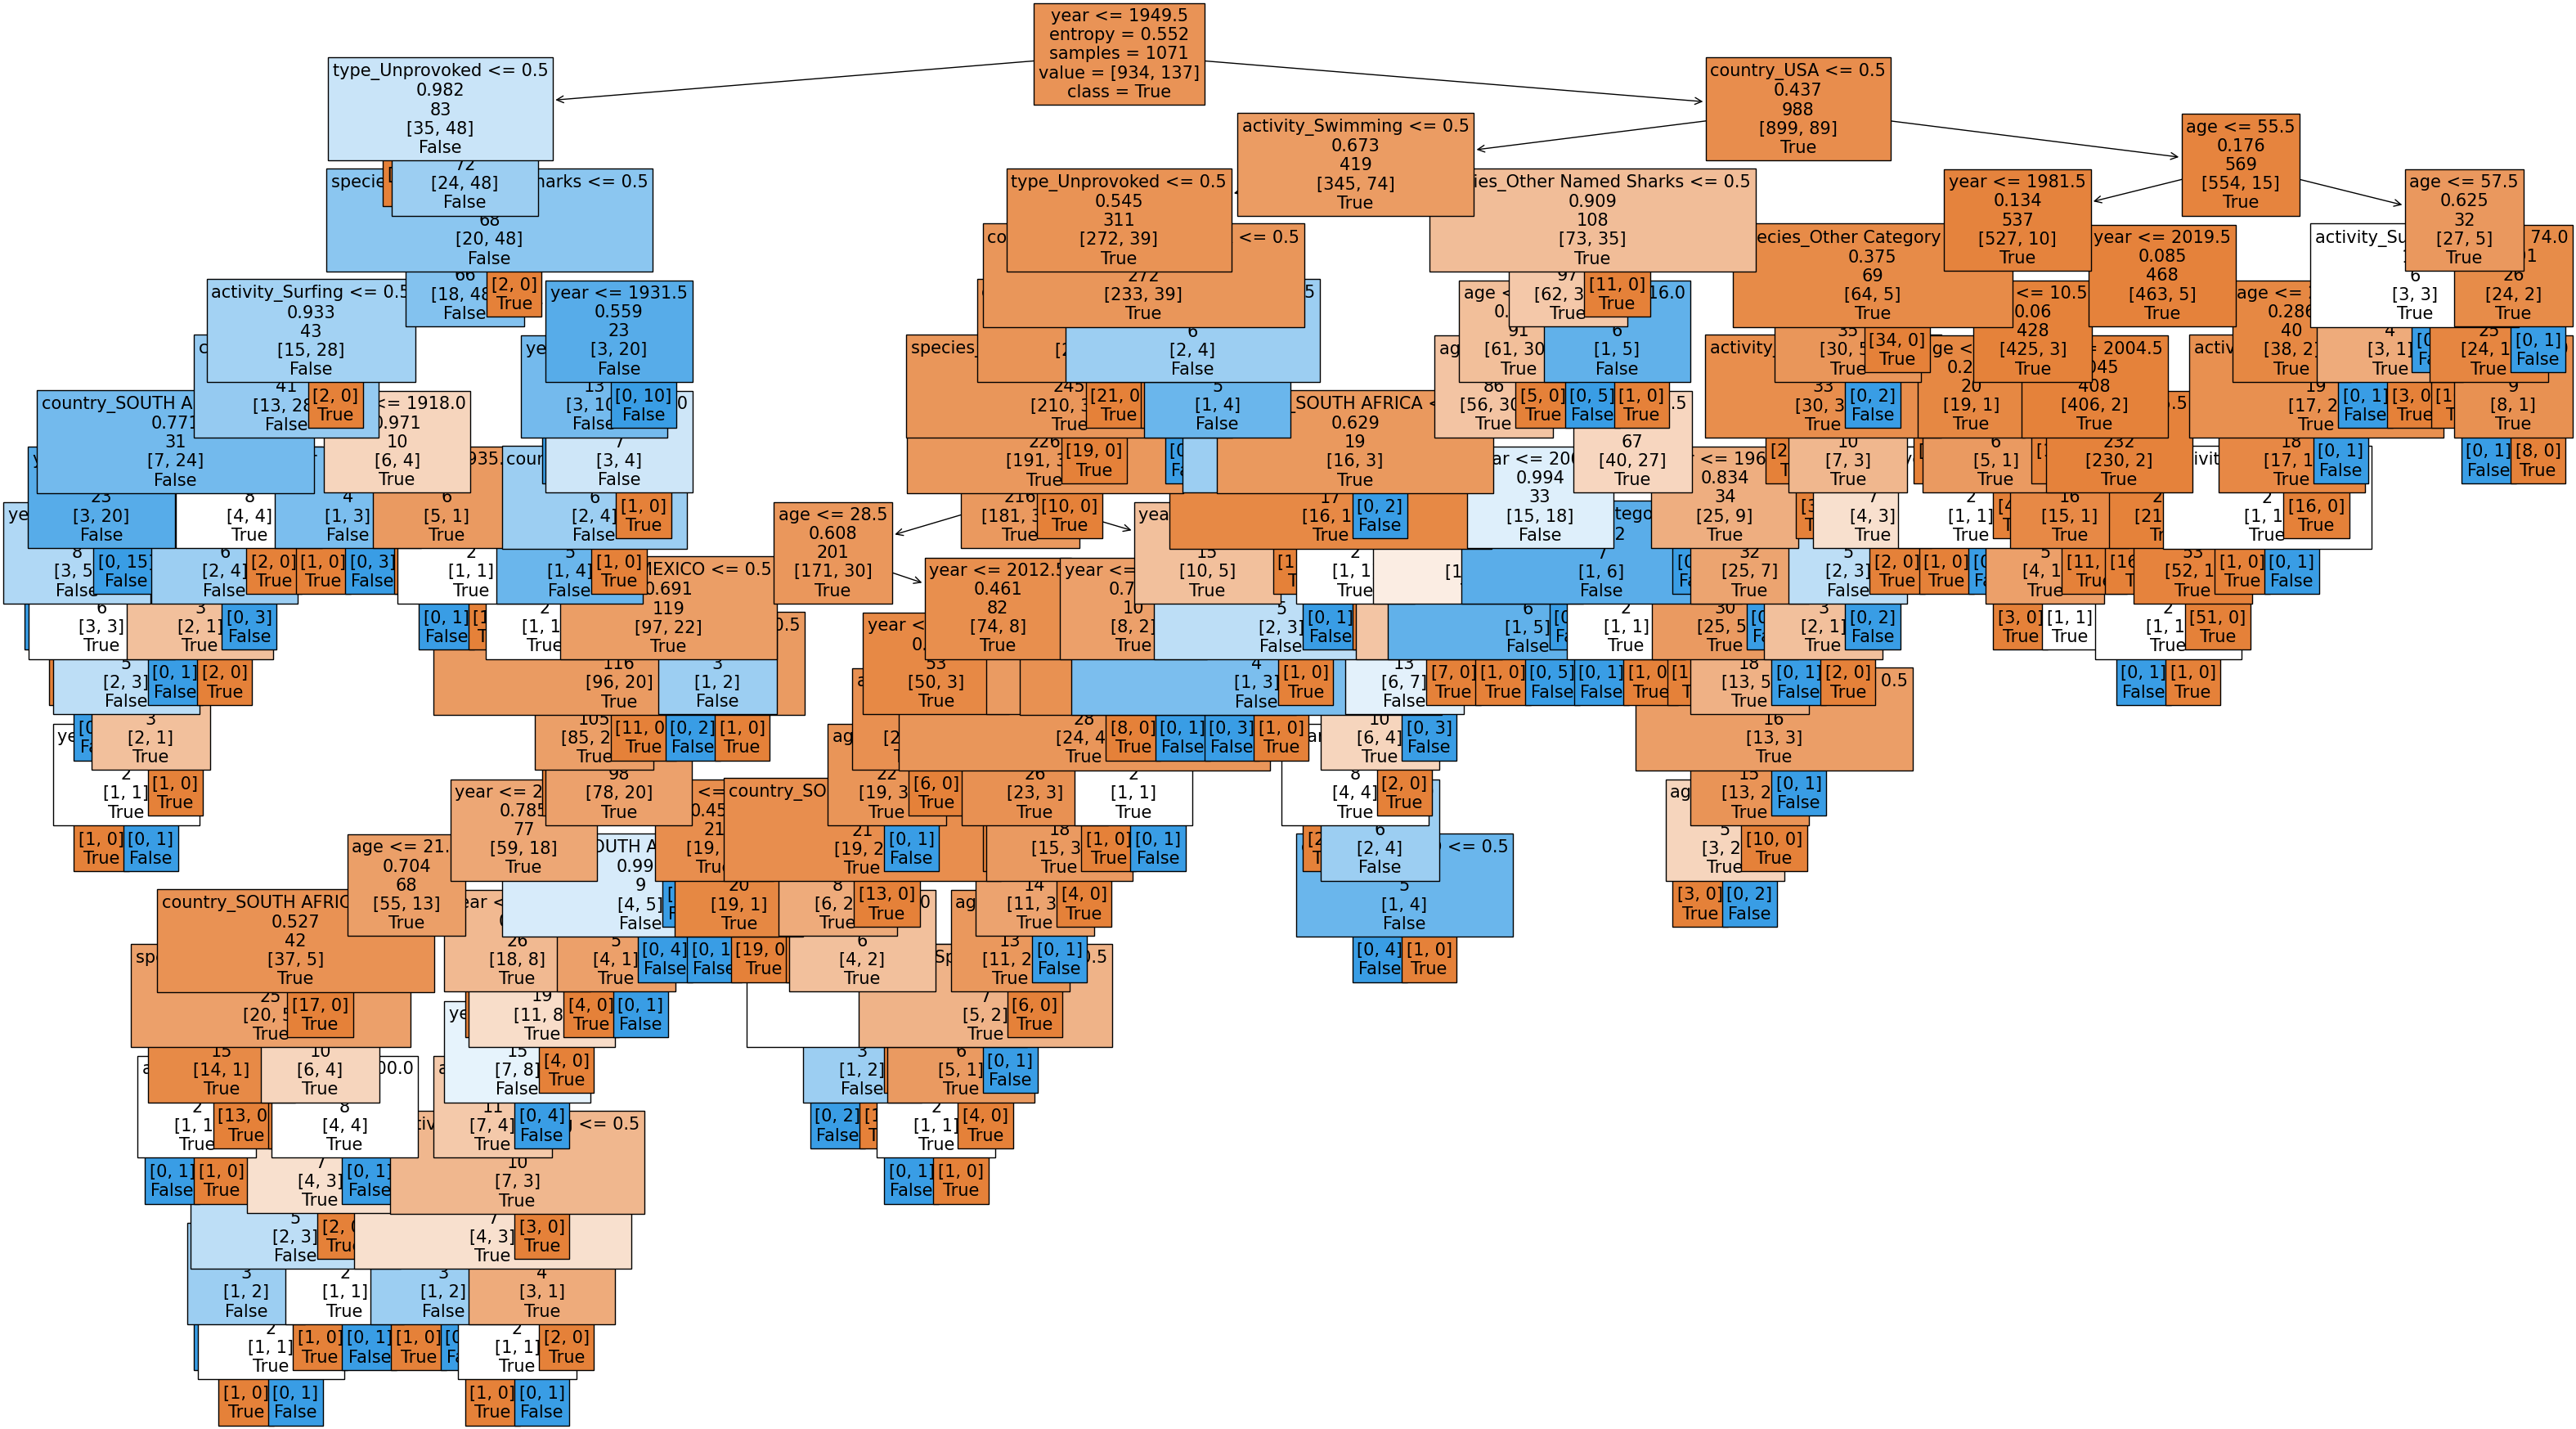

In [52]:
plt.figure(figsize = (40, 22), dpi = 100) # change dpi for size of image
plot_tree(tree, fontsize = 15, feature_names = X_train.columns.tolist(), impurity = True, class_names = ["True", "False"], label = 'root', filled = True)
plt.show()

In [53]:
y_probs = tree.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.6420


Reminder that the range of ROC AUC scores goes from 0.5 (worst) to 1.0 (best). So, this ROC AUC isn't the best.

The decision tree we just fit is highly complex and overfit to the training data. This means it has likely memorized patterns and noise rather than learning generalizable rules. Overfitting happens when the tree grows too deep, creating overly specific splits that don’t generalize well to new data.

**How to Fix It: Adding Hyperparameters**

To reduce overfitting, we can introduce hyperparameters that control the complexity of the tree. The two most common options include:

- `max_depth` – Limits how deep the tree can grow, preventing unnecessary splits.
- `min_samples_leaf` – Ensures each leaf node has a minimum number of samples, avoiding overly specific rules.

By fine-tuning these hyperparameters, we can create a simpler, more generalizable decision tree that performs better on unseen data. Let’s implement these adjustments to improve our model!

In [54]:
tree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 35, criterion = 'entropy') # initialize decision tree model
tree.fit(X_train, y_train) # train the decision tree model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=35)

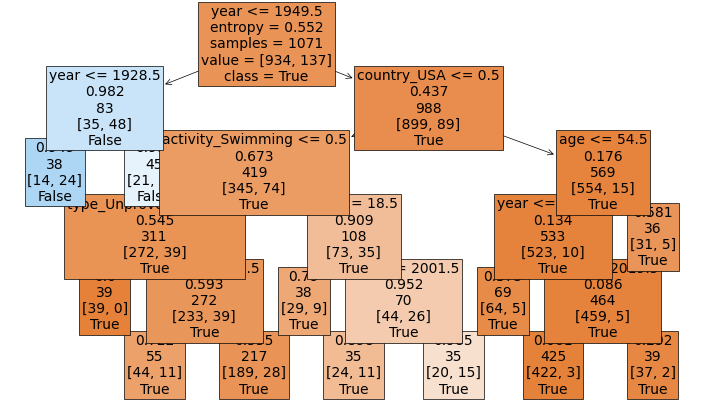

In [55]:
plt.figure(figsize = (18, 10), dpi = 50) # change dpi for size of image
plot_tree(tree, fontsize = 20, feature_names = X_train.columns.tolist(), impurity = True, class_names = ["True", "False"], label = 'root', filled = True)
plt.show()

In [56]:
y_probs = tree.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.8488


<img src="https://media.tenor.com/BEr4LRPWrtwAAAAe/thats-better-the-office.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 498px; height: 163px; margin: 4px 0px; width: 351px;" alt="Thats Better The Office GIF - Thats better The office Dwight schrute -  Discover &amp; Share GIFs" jsname="kn3ccd" aria-hidden="false">

But guess what? Don't be satisfied yet because we can still do better!

### **Competition Time!**

Try a few different values for the hyperparameters and let's see who can get the highest value for ROC AUC!

In [ ]:
# Answer here:


: 

When we did K-Nearest Neighbors (kNN), there was only one hyperparameter to play with -- k, the number of nearest neighbors. With decision trees, there are a lot more options to choose from. When building a decision tree, you can include none of these, one of these, or as many as you like. It's all about trying to maximize the performance on the test data; that's the entire game here, and your job is to find the best way to make that happen. The two hyperparameters in this code for today are the most common, but you can go to this link for a more complete list of options:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
